<a href="https://colab.research.google.com/github/poosana1/pandas-data-pre-processing/blob/main/pandas_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# in this notebook you will learn basic EDA with using adult dataset as example
# 1. Connect to google drive
# 2. Read csv file
# 3. Peek at the dataset
# 4. Dimensions of Your Data.
# 5. Data Types.
# 6. Class Distribution.
# 7. Data Summary.
# 8. All the plots

# 1. Connect to google drive

In [ ]:
import pandas as pd

In [ ]:
# We need to connect to the google drive, so that we can load the dataset
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/3.2.csv'

# 2. Read csv file

In [ ]:
# read the file and assign the header
df = pd.read_csv(file_path, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])

# 3. Quick peek

In [ ]:
# quick peek of the dataset how it looks like
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 4. Understand data type

In [ ]:
# lets look the type of data
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [ ]:
# lets look the dimension of the dataset
df.shape

(32561, 15)

# 5. Descriptive stat

In [ ]:
# Descriptive statistics can provide a welth of information about the nature of each feature
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# now, we look at class distribution (classification task)
df.groupby('salary').size()

salary
 <=50K    24720
 >50K      7841
dtype: int64

In [ ]:
# we can see that we have class imbalance problem now 1:3, we will discuss how to remedy later.
# pandas is pretty neat such that we can also look for correlation between attributes.
df.corr(method="pearson")

<ipython-input-72-cc438f963eb9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [ ]:
# many machine learning algorithms assume a Gaussian distribution, so need to check (the closer to zero the less skew)
df.skew()

<ipython-input-73-d38e6baf4c19>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

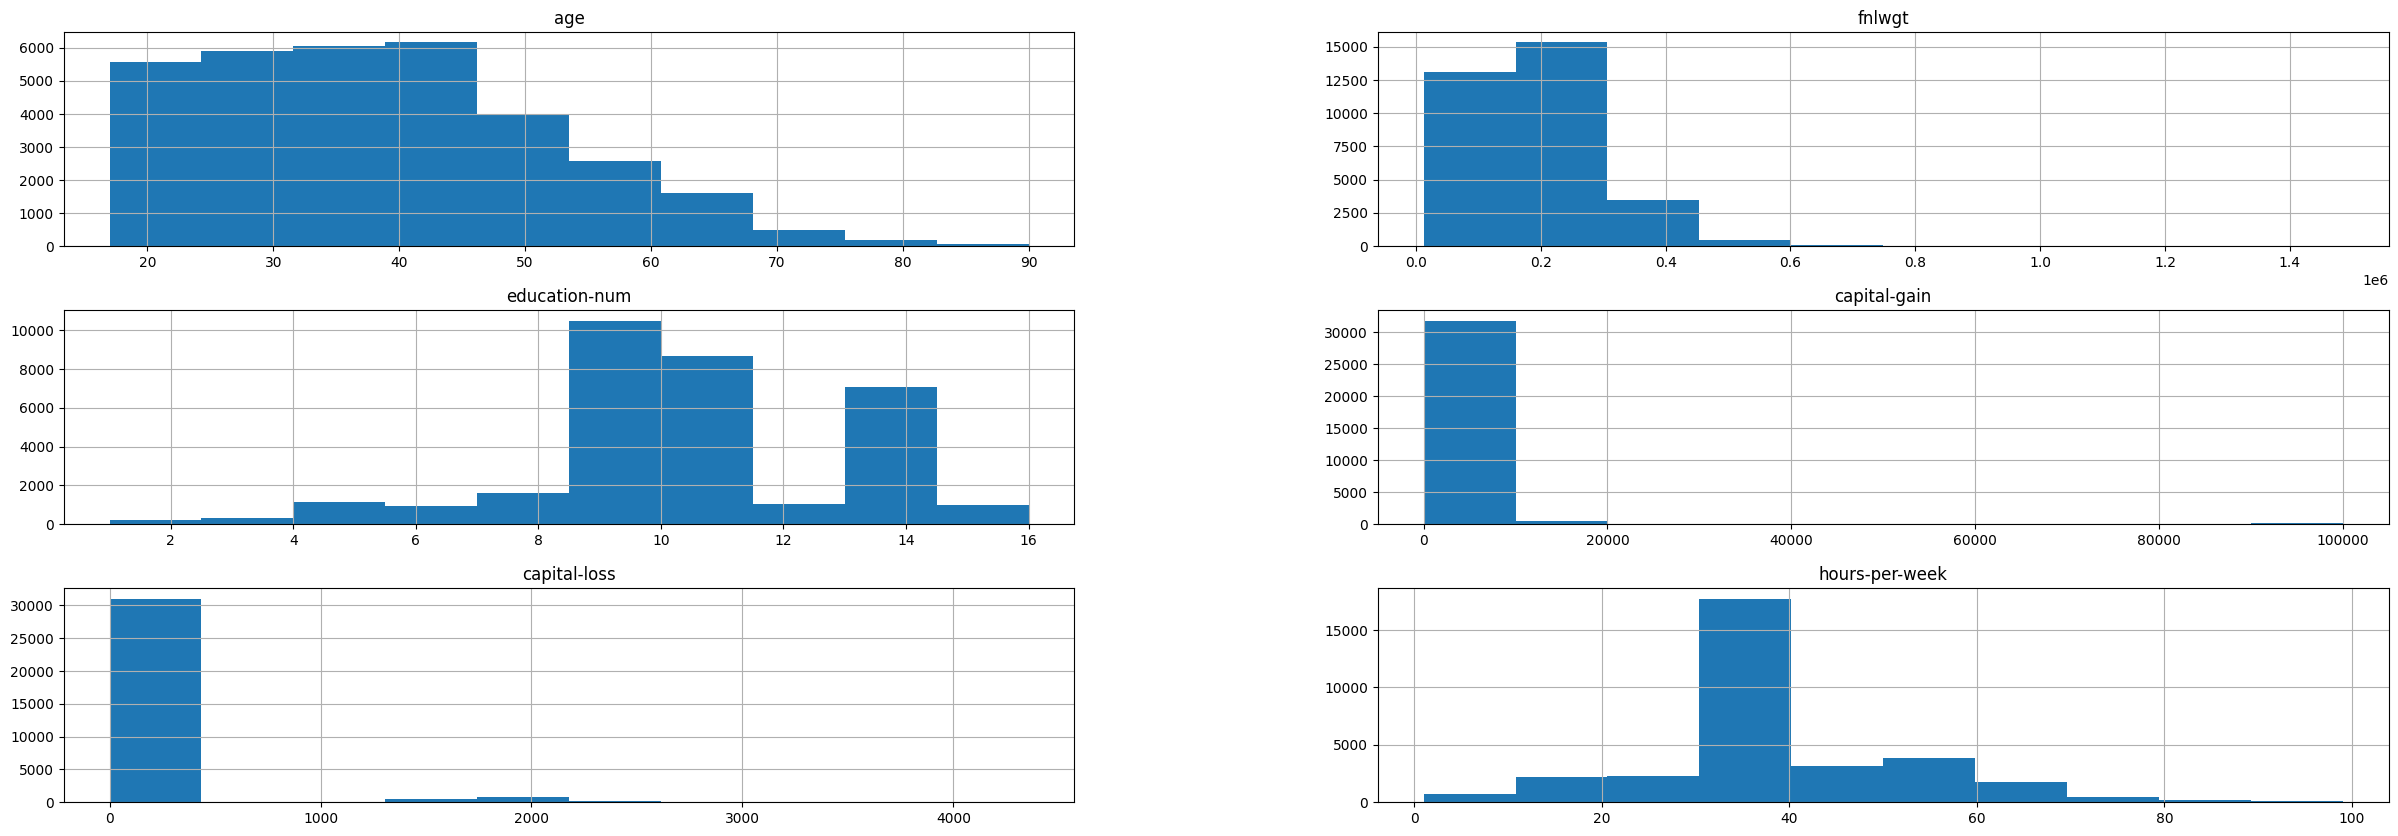

In [ ]:
# visualization can be used to understand your data (e.g., to get an idea of the distribution of each attribute is to loo)
df.hist(figsize = (30,10))

age                  Axes(0.125,0.712609;0.168478x0.167391)
fnlwgt            Axes(0.327174,0.712609;0.168478x0.167391)
education-num     Axes(0.529348,0.712609;0.168478x0.167391)
capital-gain      Axes(0.731522,0.712609;0.168478x0.167391)
capital-loss         Axes(0.125,0.511739;0.168478x0.167391)
hours-per-week    Axes(0.327174,0.511739;0.168478x0.167391)
dtype: object

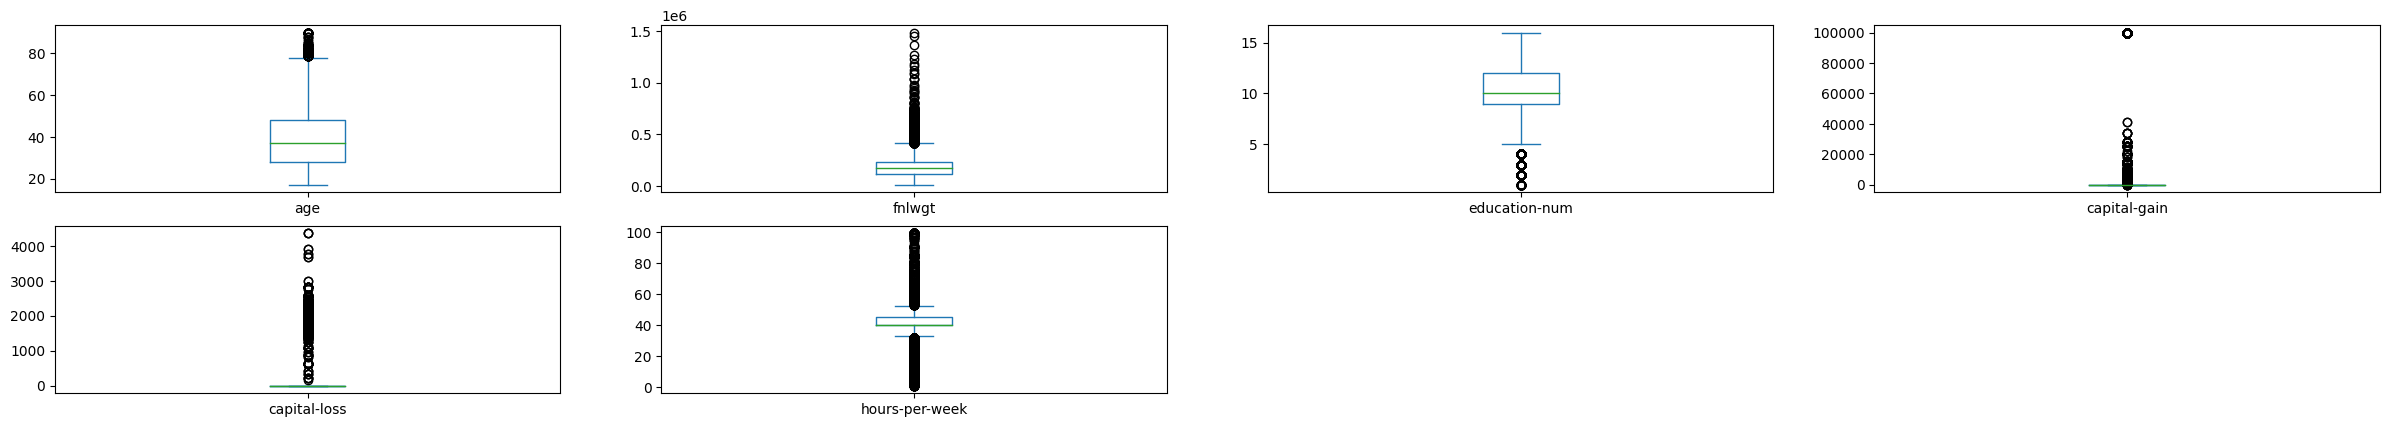

In [ ]:
df.plot(figsize=(30,10),kind = 'box',subplots = True,layout=(4,4),sharex = False,sharey = False)

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fnlwgt', ylabel='age'>,
        <Axes: xlabel='education-num', ylabel='age'>,
        <Axes: xlabel='capital-gain', ylabel='age'>,
        <Axes: xlabel='capital-loss', ylabel='age'>,
        <Axes: xlabel='hours-per-week', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fnlwgt'>,
        <Axes: xlabel='fnlwgt', ylabel='fnlwgt'>,
        <Axes: xlabel='education-num', ylabel='fnlwgt'>,
        <Axes: xlabel='capital-gain', ylabel='fnlwgt'>,
        <Axes: xlabel='capital-loss', ylabel='fnlwgt'>,
        <Axes: xlabel='hours-per-week', ylabel='fnlwgt'>],
       [<Axes: xlabel='age', ylabel='education-num'>,
        <Axes: xlabel='fnlwgt', ylabel='education-num'>,
        <Axes: xlabel='education-num', ylabel='education-num'>,
        <Axes: xlabel='capital-gain', ylabel='education-num'>,
        <Axes: xlabel='capital-loss', ylabel='education-num'>,
        <Axes: xlabel='hours-per-week', ylabel='education-num'>],
 

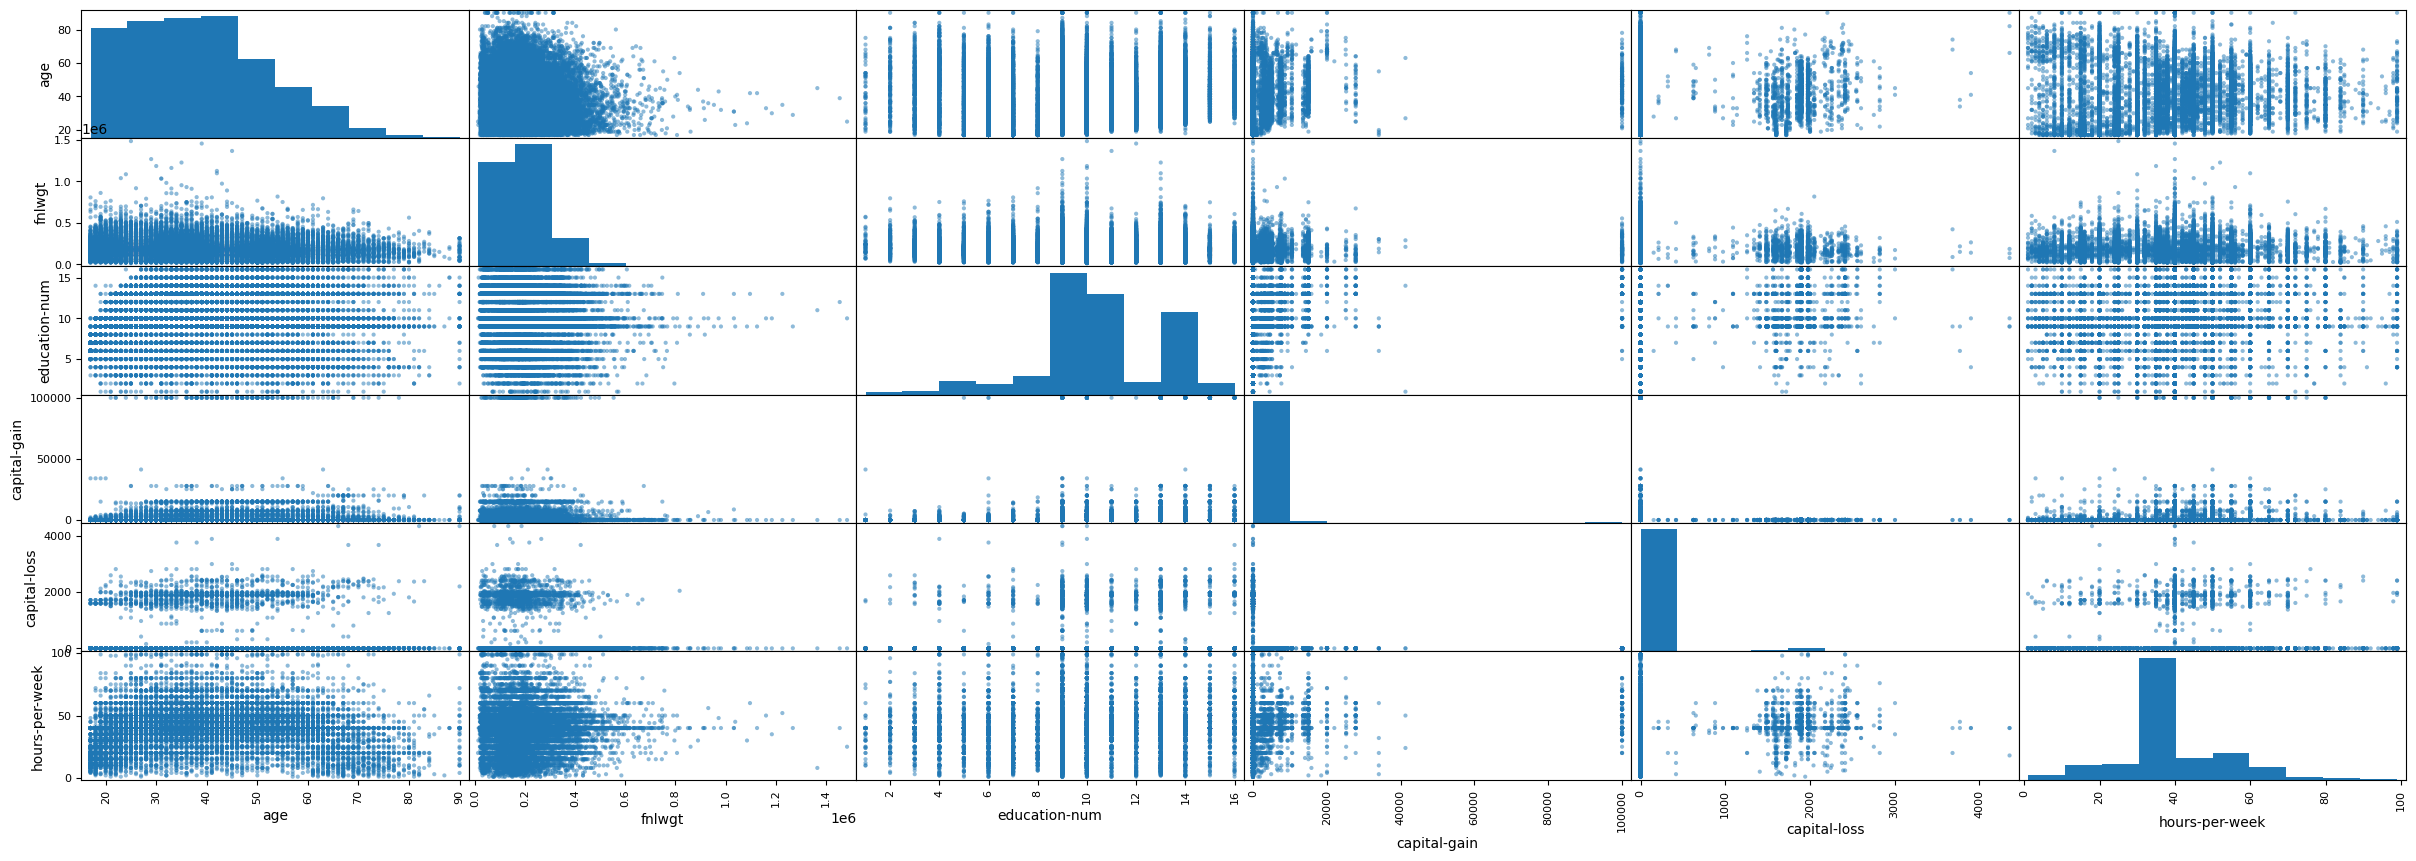

In [ ]:
# Scatter plots are helpful for identifying structured relationships between variables, such as if two variables may be
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(30,10))

# **Data Transformation - one-hot for nominal**

In [ ]:
# assumed that you already have cleaned the data, we now perform one-hot encoding for nominal
df = pd.get_dummies(df, prefix='workclass', columns = ['workclass'],drop_first=False)

In [ ]:
df.head()

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,<=50K,0,0,0,0,0,0,0,1,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,<=50K,0,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,<=50K,0,0,0,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,<=50K,0,0,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,<=50K,0,0,0,0,1,0,0,0,0


In [ ]:
# do the same with the rest of nominal features
df = pd.get_dummies(df, prefix='age', columns=['age'], drop_first=False)
df = pd.get_dummies(df, prefix='education', columns=['education'], drop_first=False)
df = pd.get_dummies(df, prefix='occupation', columns=['occupation'], drop_first=False)
df = pd.get_dummies(df, prefix='relationship', columns=['relationship'], drop_first=False)
df = pd.get_dummies(df, prefix='race', columns=['race'], drop_first=False)
df = pd.get_dummies(df, prefix='sex', columns=['sex'], drop_first=False)
df = pd.get_dummies(df, prefix='native-country', columns=['native-country'], drop_first=False)
df = pd.get_dummies(df, prefix='marital-status', columns=['marital-status'], drop_first=False)

In [ ]:
df.head()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,77516,13,2174,0,40,<=50K,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,83311,13,0,0,13,<=50K,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,215646,9,0,0,40,<=50K,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,234721,7,0,0,40,<=50K,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,338409,13,0,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# we also need to transform the target to one hot
df['salary'] = df['salary'].astype('category').cat.codes

# Data Transformation - Rescale using min-max algorithm

In [ ]:
# see... now have 175 features wchich may cause bad predictive performance. (we might need to go back and using domain knowledge)
# but lets continue real fast, lets deal with the attributes with varying scales, continuous values..
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Use StandarScaler if you know the data distribution is normal

In [ ]:
df['fnlwgt'] = scaler.fit_transform(df[['fnlwgt']])

In [ ]:
df['fnlwgt']

0        0.044302
1        0.048238
2        0.138113
3        0.151068
4        0.221488
           ...   
32556    0.166404
32557    0.096500
32558    0.094827
32559    0.128499
32560    0.187203
Name: fnlwgt, Length: 32561, dtype: float64

In [ ]:
# now you do the same for the restm lets fit to the basic ML model here using KNN.
# we need to split the dataset to train and test using train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df['salary'],test_size = 0.30, random_state = 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22792, 180), (9769, 180), (22792,), (9769,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train) #we use the training set

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# now our classifier is learned , we are going to test the brain with unsseen data using test set
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [ ]:
# import scikit-Learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy: {0:0.3f}%".format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy: 93.930%
